# Baml - What's that? 

### BAML: Basically a Made-up Language
ooooor, if you'de like;
### BAML: Bad-ass Machine Learning 


## Intro
BAML is a domain-specific language to generate structured outputs from LLMs.

With BAML you can build reliable Agents, Chatbots with RAG, extract data from PDFs, and more.

Some key features: 
- An amazingly fast developer experience for prompting in the BAML VSCode playground
- Fully type-safe outputs, even when streaming structured data (that means autocomplete!)
- Flexibility — it works with any LLM, any language, and any schema.
- State-of-the-art structured outputs that even outperform OpenAI with their own models and Strict Structured output

Check out their benchmarks here; 
[BAML-benchmarks](https://www.boundaryml.com/blog/sota-function-calling?q=0)


Only the "AI-part" of the code must be written in BAML which then can be transformed to most used languages such as **Python, Typescript, Ruby or exposure through a REST API** for all other languages.


BoundaryML, the company behind BAML is backed by YCombinator and have active founders with background from Microsoft and AWS.

## Background
Prompts are more than just f-strings; they’re actual functions with logic that can quickly become complex to organize, maintain, and test.
Currently, developers craft LLM prompts as if they’re writing raw HTML and CSS in text files, lacking:

- Type safety
- Hot-reloading or previews
- Linting

The situation worsens when dealing with structured outputs. Since most prompts rely on Python and Pydantic, developers must execute their code and set up an entire Python environment just to test a minor prompt adjustment, or they have to setup a whole Python microservice just to call an LLM.

BAML allows you to view and run prompts directly within your editor, similar to how Markdown Preview function — no additional setup necessary, that interoperates with all your favorite languages and frameworks.

There are, however, a multitude of different solutions for parsing LLM responses and there are more to come even though strict function calling using Pydantic models are maybe in the "lead".

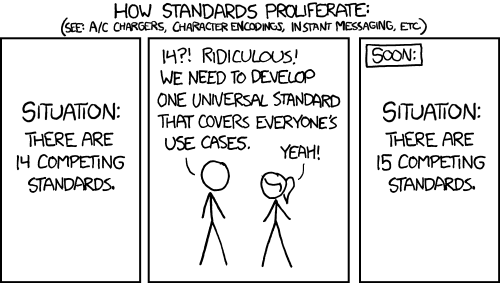

## How to BAML

The core BAML principle is that all LLM prompts are in the end functions that takes in parameters and returns type(s). See: [BAML-basics](https://github.com/BoundaryML/baml?tab=readme-ov-file#the-core-baml-principle-llm-prompts-are-functions)


```bash
function ChatAgent(message: Message[], tone: "happy" | "sad") -> StopTool | ReplyTool {
    client "openai/gpt-4o-mini"

    prompt #"
        Be a {{ tone }} bot.

        {{ ctx.output_format }}

        {% for m in message %}
        {{ _.role(m.role) }}
        {{ m.content }}
        {% endfor %}
    "#
}

class Message {
    role string
    content string
}

class ReplyTool {
  response string
}

class StopTool {
  action "stop" @description(#"
    when it might be a good time to end the conversation
  "#)
}
```

These defined functions will then be autogenerated into the chosen language such that they  can be directly run either sync or async like;

```python
from baml_client import b
from baml_client.types import Message, StopTool

messages = [Message(role="assistant", content="How can I help?")]

while True:
  print(messages[-1].content)
  user_reply = input()
  messages.append(Message(role="user", content=user_reply))
  tool = b.ChatAgent(messages, "happy")
  if isinstance(tool, StopTool):
    print("Goodbye!")
    break
  else:
    messages.append(Message(role="assistant", content=tool.reply))
```


BAML is currently supporting most of the LLM providers and works great with Ollama for everyone that would like to test locally. Supported LLM providers (OpenAI • Anthropic • Gemini • Vertex • Bedrock • Azure OpenAI • Anything OpenAI Compatible (Ollama, OpenRouter, VLLM, LMStudio, TogetherAI, and more)).
However, larger changes to models such as some models using 'model' or 'developer' instead of 'assistant' or 'system' might break both in the BAML playground and running the tools so be adviced to check this for all *new* models.


## Why to BAML?


### The Playground (in VSCode for now)

![Screenshot 2025-02-28 at 16.12.45.png](<attachment:Screenshot 2025-02-28 at 16.12.45.png>)

#### Hot-reloading for prompts
Using the playground drastically decreases iteration speed for testing LLM calls between models, different apporaches, system messages etc. which is particularly valuable when working with structured output!
If testing your pipeline takes 2 minutes, in 20 minutes, you can only test **10 ideas**.
If testing your pipeline took 5 seconds, in 20 minutes, you can test **240 ideas**. ***QUICKMATHS***

Notes:
The BAML playground is running fully locally on our machines.
The API keys added to the playground are stored in local storage and BAML NEVER makes any remote requests other than the API calls to the LLM API endpoints
The playground is actually just a React app that is loaded in VSCode.

### Structured output with ANY LLM
The rapid development cycle and release of ever new SOTA (State of the art) models with different capabilities, in particular lacking structured output can put a hold on model usage and testing of newly released models. However, BAML seeks to solve this problem by basing all interactions with the LLM, also for function calling and so on using ChatCompletion!

This is done using SAP (NOT the ERP system), Schema-Aligned Parsing, an algorithm to support the flexible outputs LLMs can provide, like markdown within a json blob or a chain-of-thought pror to the actual answer. See [Schema-aligned-parsing](https://www.boundaryml.com/blog/schema-aligned-parsing)

### Streaming out of the box
Streaming is way harder than it should be. With our [Python/Typescript/Ruby] generated code, streaming becomes natural and type-safe, also for structured output! 

### No strings attached
Apache 2 license (100% open source)
No data i stored and no network requests behond models calls that are explicitly set (100% private)
Blazingly fast, built in Rust.


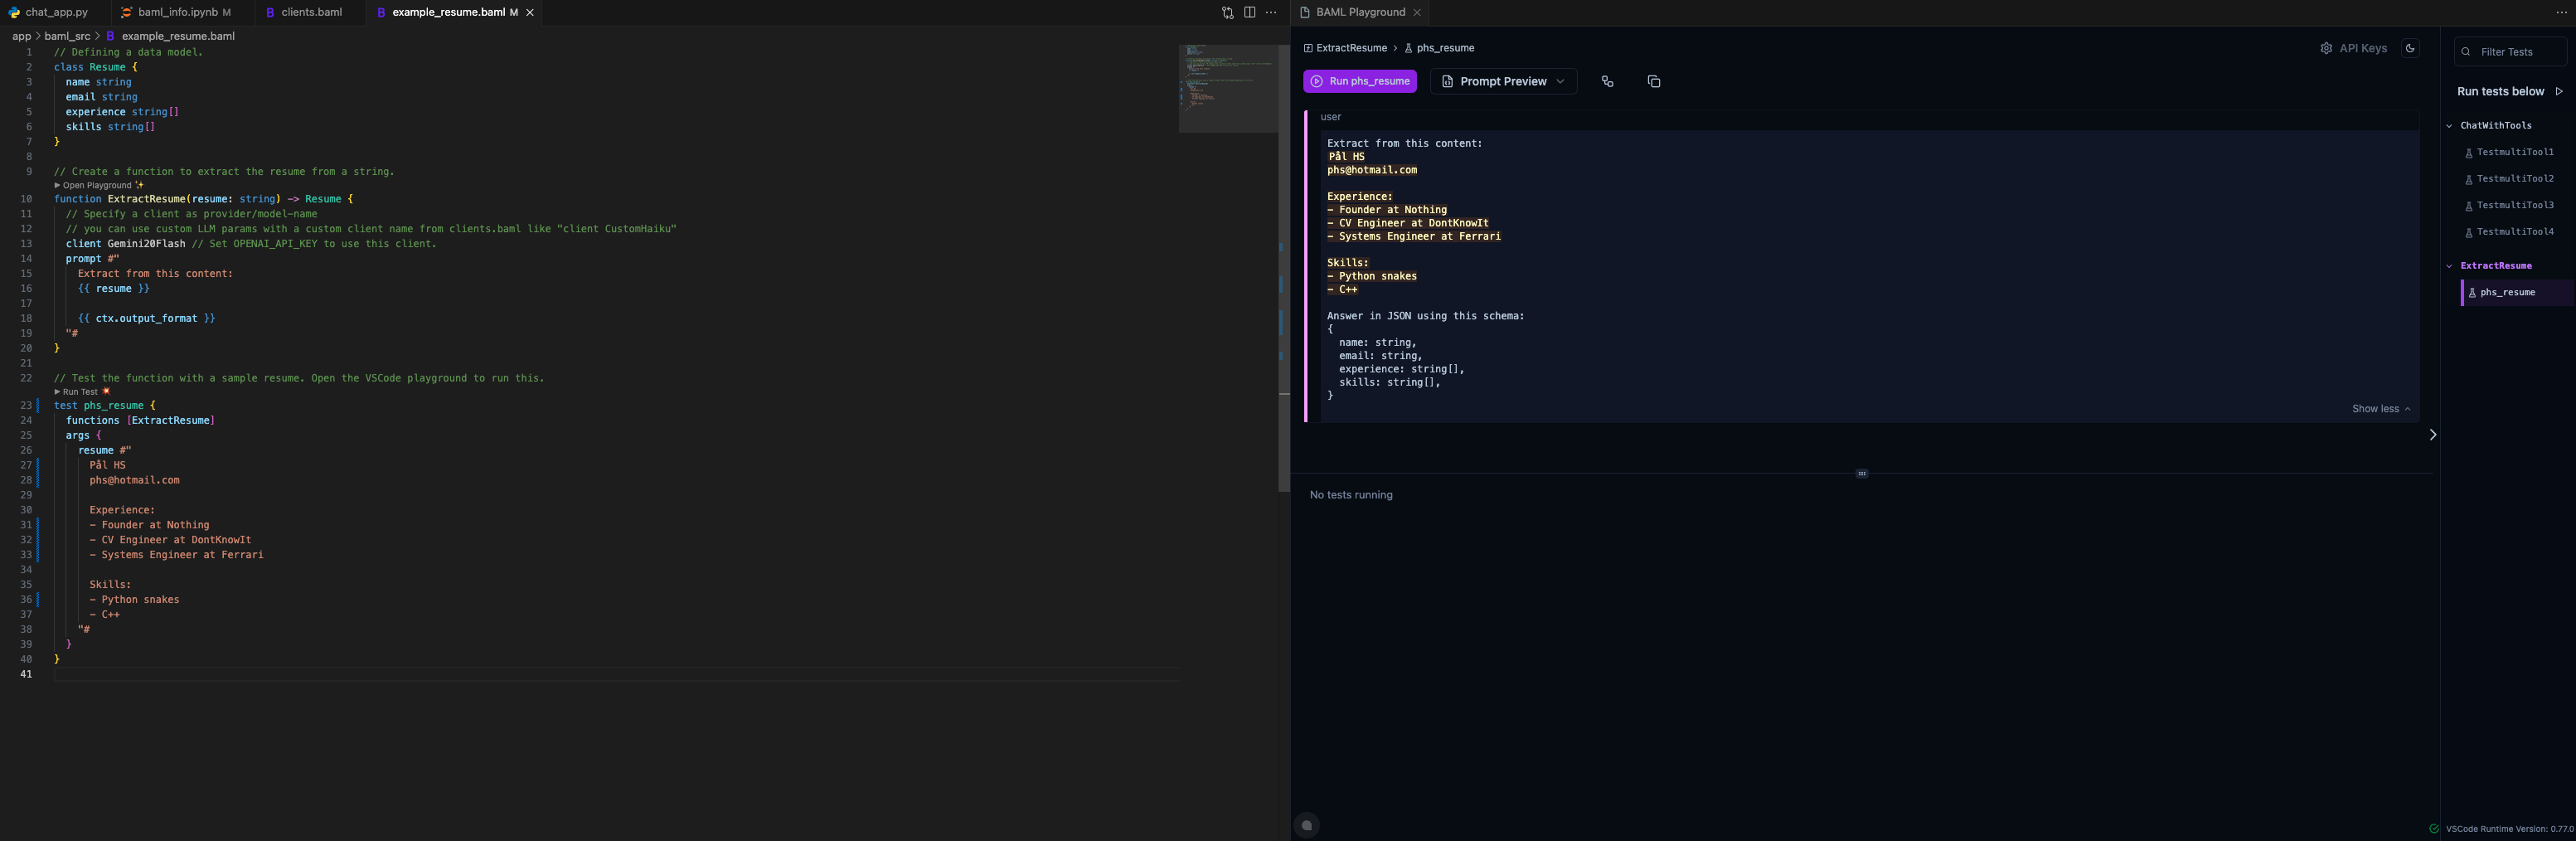

## Additional information

### Beating OpenAIs structured output on cost, accuracy and speed!
1. BAML is more accurate and cheaper for function calling than any native function calling API. It's easily 2-4x faster than OpenAI's FC-strict API.
2. BAML's technique is model-agnostic and works with any model without modification (even open-source ones).
3. gpt-3.5-turbo, gpt-4o-mini, and claude-haiku with BAML work almost as well as gpt4o with structured output (less than 2%)
4. Using FC-strict over naive function calling improves every older OpenAI models, but gpt-4o-2024-08-06 gets worse

![Screenshot 2025-02-28 at 15.01.33.png](<attachment:Screenshot 2025-02-28 at 15.01.33.png>)

#### What BAML does differently
Replaces JSON schemas with typescript-like definitions. e.g. string[] is easier to understand than {"type": "array", "items": {"type": "string"}}.
Uses a novel parsing technique (Schema-Aligned Parsing) inplace of JSON.parse. SAP allows for fewer tokens in the output with no errors due to JSON parsing. For example, this can be parsed even though there are no quotes around the keys. [why-use-sap](https://www.boundaryml.com/blog/schema-aligned-parsing)

Key findings:
- Models are really, really good an semantic understanding.
- type-definitions are way more cost efficient with about **60% less token usage** for structured outputs. See: [type-definitions](https://www.boundaryml.com/blog/type-definition-prompting-baml)
- Models are really bad at things that have to be perfect like perfect JSON, perfect SQL, compiling code, etc.
- Research has shown that models perform worse when they are constrained
- No model/technique can ever reach 100% with the current data since some prompts are confusing even to humans, or the results are not checked correctly. We did not change/fix the existing assertions (yet) to compare our score more closely against other previous runs of this benchmark. This is due to their probablistic and not deterministic nature and is a feature, not a bug.


### Comparing with Pydantic
One of the painpoints when working with pydantic extracts might actually be that you want a list of objects on the form: -> List[Resume]. This is NOT supported using pydantic models and thereby, you would need a dedicated pydantic class in order to wrap the list of Resumes...
Also, tangled json structures / pydantic models usually adds a lot of tokens to the context versus the Jinja syntax resulting in both higher costs ans latencies without necessarily increasing the accuracy, often actually decreasing accuracy because of confusion by the complexity.
More info: [Comparison-pydantic](https://docs.boundaryml.com/guide/comparisons/baml-vs-pydantic)

### Other tips and tricks
Checkout out their prompt engineering page [prompt-engineering](https://docs.boundaryml.com/examples/prompt-engineering/symbol-tuning)

And PromptFiddle or similar to test more of their functionalities. **Happy bleating!**
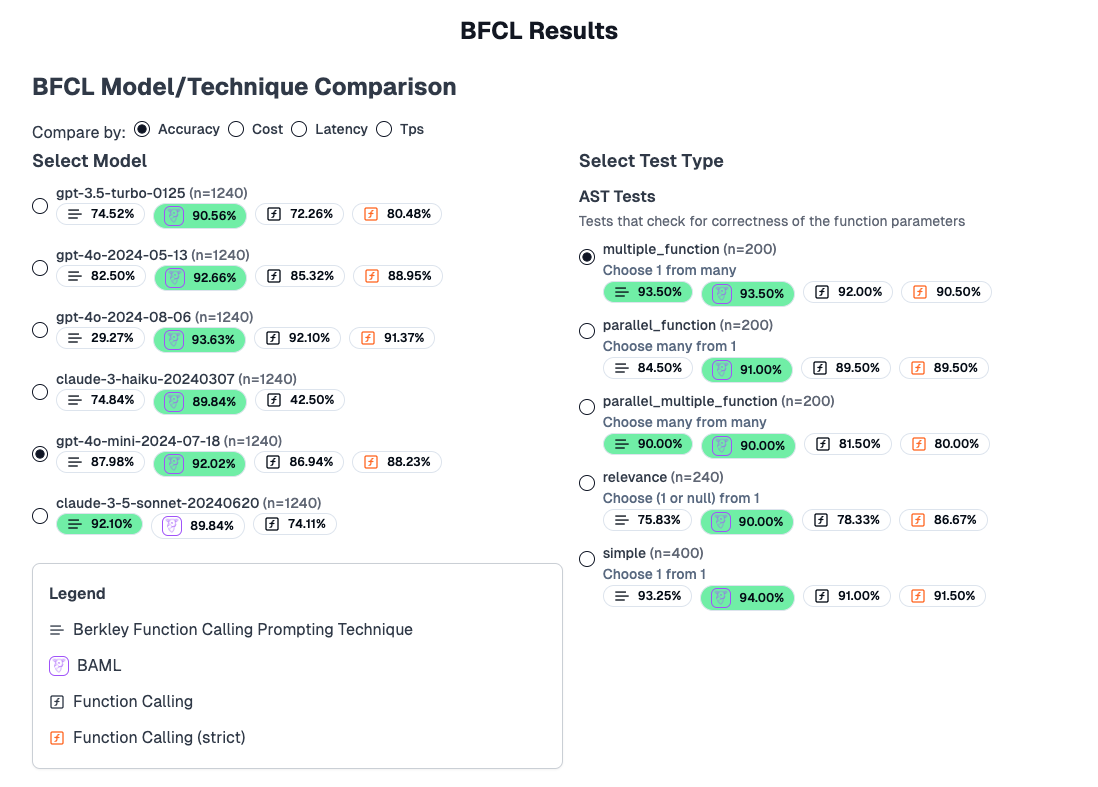